In [20]:
#En küçük kareler regresyonu olarak da bilinir.
#PCR'dan farkı odak noktamız bağımlı değişken, aralarındaki 
#ilişkiyi maksimum özetleyecek modeli oluşturacağız

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression, PLSSVD #Muhatabımız
from sklearn import model_selection
import matplotlib.pyplot as plt

hitters=pd.read_csv("Hitters.csv")
df=hitters.copy()
df=df.dropna()
ms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df['Salary']
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,ms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [4]:
pls_model=PLSRegression(n_components=2).fit(X_train,y_train)

In [5]:
np.sqrt(mean_squared_error(y_train,pls_model.predict(X_train)))

310.1167593109696

In [6]:
r2_score(y_train,pls_model.predict(X_train))

0.5140424486535481

In [7]:
predicted_by_model=pls_model.predict(X_test)

In [8]:
np.sqrt(mean_squared_error(predicted_by_model,y_test))

398.09956327448526

In [9]:
#Şimdi model tuning işlemleri başlıyor
#PCR regresyondaki hataları bir kümede toplama döngüsünü aynen
#kullanıyoruz.

In [18]:
cv_10=model_selection.KFold(n_splits=10,
                            shuffle=True,
                            random_state=1)
RMSE =[]

for i in np.arange(1, X_train.shape[1] + 1):
    pls=PLSRegression(n_components=i)
    score = np.sqrt(-1*model_selection.cross_val_score(pls, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

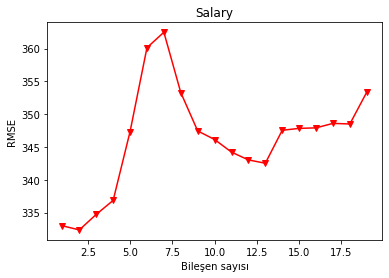

In [25]:
plt.plot(np.arange(1,X_train.shape[1]+1),np.array(RMSE),'-v',c='r')
plt.xlabel('Bileşen sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [27]:
#Zaten optimum'u fit etmişiz, 2 değişkenli (tamamen şans)